<a href="https://colab.research.google.com/github/Jane0731/Homework/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A_W9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 取得股價資料

In [12]:
!pip install yfinance

In [13]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [14]:
# 輸入股票代號
stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
start = end - dt.timedelta(days=365)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
data = yf.download(stock_id, start=start, end=end).reset_index()

data

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2023-11-09 00:00:00+00:00,546.966003,557.0,557.0,551.0,551.0,13165684
1,2023-11-10 00:00:00+00:00,546.966003,557.0,557.0,554.0,555.0,12994933
2,2023-11-13 00:00:00+00:00,560.713806,571.0,580.0,571.0,579.0,43866014
3,2023-11-14 00:00:00+00:00,561.695740,572.0,576.0,571.0,576.0,21568576
4,2023-11-15 00:00:00+00:00,570.533630,581.0,583.0,575.0,583.0,50305088
...,...,...,...,...,...,...,...
237,2024-11-01 00:00:00+00:00,1025.000000,1025.0,1030.0,996.0,996.0,54480255
238,2024-11-04 00:00:00+00:00,1040.000000,1040.0,1045.0,1025.0,1030.0,26747978
239,2024-11-05 00:00:00+00:00,1050.000000,1050.0,1055.0,1030.0,1030.0,32385622


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [16]:
# 只选择Date和Adj Close列
df = data[['Date', 'Adj Close']]
df['Date'] = pd.to_datetime(df['Date'])

# 设定日期为索引
df.set_index('Date', inplace=True)
df

<ipython-input-16-f4a38716e7a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


Price,Adj Close
Ticker,2330.TW
Date,
2023-11-09 00:00:00+00:00,546.966003
2023-11-10 00:00:00+00:00,546.966003
2023-11-13 00:00:00+00:00,560.713806
2023-11-14 00:00:00+00:00,561.695740
2023-11-15 00:00:00+00:00,570.533630
...,...
2024-11-01 00:00:00+00:00,1025.000000
2024-11-04 00:00:00+00:00,1040.000000


In [17]:
# 標準化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))

In [18]:
# 建立輸入輸出時間序列 (用20天的資料預測未來1天)
sequence_length = 5  # 20天資料預測1天
dt = []
dates = []  # 同步保存日期
for i in range(len(scaled_data) - sequence_length):
    dt.append(scaled_data[i:i+sequence_length+1])
    dates.append(df.index[i+sequence_length])  # 保存对应的日期

dt = np.array(dt)
x_train = dt[:, :-1]
y_train = dt[:, -1]
dates = np.array(dates)  # 日期列表

# 切分数据集
x_train, x_test, y_train, y_test, train_dates, test_dates = train_test_split(
    x_train, y_train, dates, test_size=0.2, random_state=42, shuffle=False
)

# 將資料轉換為 PyTorch tensors
x_train = torch.FloatTensor(x_train).view(-1, sequence_length, 1)  # 轉換為 (batch_size, sequence_length, input_size)
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(x_test).view(-1, sequence_length, 1)
y_test = torch.FloatTensor(y_test)




# 使用 LSTM 模型預測股票未來價格，自訂窗口大小，並分析預測效果。

In [19]:
# 使用LSTM模型
class LSTMStockPredictor(nn.Module):
    def __init__(self):
        super(LSTMStockPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, num_layers=2, batch_first=True)
        self.fc = nn.Linear(64, 1)  # LSTM输出的隐藏状态与全连接层的输出

    def forward(self, x):
        # LSTM輸出為 outputs, (hn, cn)
        lstm_out, _ = self.lstm(x)
        # 取最后一个时间步的输出
        x = lstm_out[:, -1, :]
        x = self.fc(x)
        return x

In [20]:
# 初始化模型、損失函數和優化器
model = LSTMStockPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練模型
epochs = 500
for epoch in range(epochs):
    model.train()

    # 前向傳播
    outputs = model(x_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # 反向傳播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 10/500, Loss: 0.1189
Epoch 20/500, Loss: 0.0703
Epoch 30/500, Loss: 0.0544
Epoch 40/500, Loss: 0.0425
Epoch 50/500, Loss: 0.0243
Epoch 60/500, Loss: 0.0070
Epoch 70/500, Loss: 0.0064
Epoch 80/500, Loss: 0.0048
Epoch 90/500, Loss: 0.0043
Epoch 100/500, Loss: 0.0037
Epoch 110/500, Loss: 0.0034
Epoch 120/500, Loss: 0.0030
Epoch 130/500, Loss: 0.0028
Epoch 140/500, Loss: 0.0026
Epoch 150/500, Loss: 0.0025
Epoch 160/500, Loss: 0.0024
Epoch 170/500, Loss: 0.0023
Epoch 180/500, Loss: 0.0023
Epoch 190/500, Loss: 0.0023
Epoch 200/500, Loss: 0.0023
Epoch 210/500, Loss: 0.0023
Epoch 220/500, Loss: 0.0023
Epoch 230/500, Loss: 0.0022
Epoch 240/500, Loss: 0.0022
Epoch 250/500, Loss: 0.0022
Epoch 260/500, Loss: 0.0022
Epoch 270/500, Loss: 0.0022
Epoch 280/500, Loss: 0.0022
Epoch 290/500, Loss: 0.0022
Epoch 300/500, Loss: 0.0022
Epoch 310/500, Loss: 0.0022
Epoch 320/500, Loss: 0.0022
Epoch 330/500, Loss: 0.0022
Epoch 340/500, Loss: 0.0022
Epoch 350/500, Loss: 0.0022
Epoch 360/500, Loss: 0.0022
E

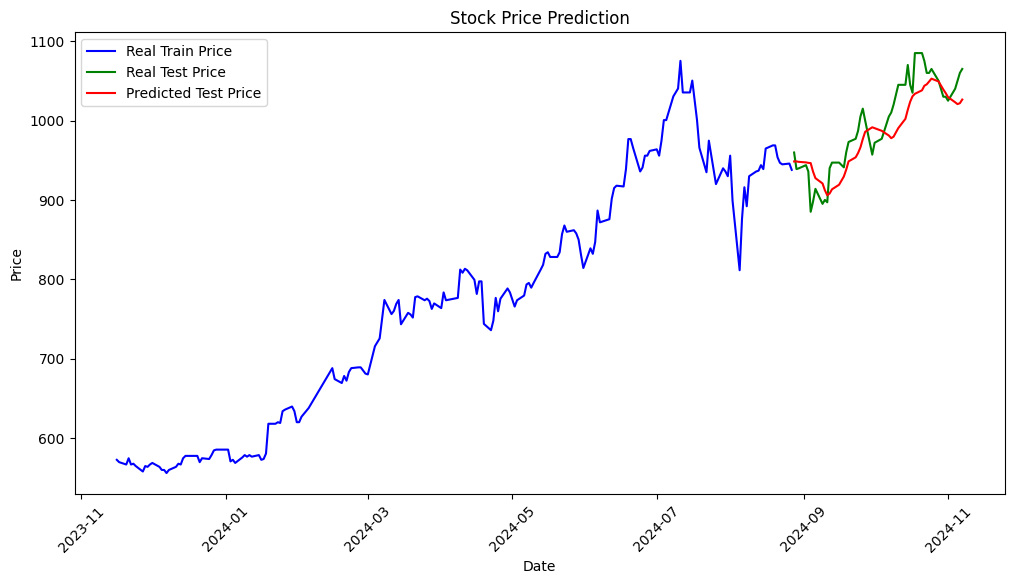

In [21]:
# 先进行模型预测（仅对测试集进行预测）
model.eval()
with torch.no_grad():
    predicted_test = model(x_test).detach().numpy()  # 模型对测试集进行预测

# 反归一化数据
predicted_test_prices = scaler.inverse_transform(predicted_test)  # 将预测的标准化值转回原始股价
real_test_prices = scaler.inverse_transform(y_test.view(-1, 1).numpy())  # 测试集真实股价
real_train_prices = scaler.inverse_transform(y_train.view(-1, 1).numpy())  # 训练集真实股价

# 绘制图表
plt.figure(figsize=(12, 6))

# 绘制训练集的真实价格 (蓝色)
plt.plot(train_dates, real_train_prices, color='blue', label='Real Train Price')

# 绘制测试集的真实价格 (绿色)
plt.plot(test_dates, real_test_prices, color='green', label='Real Test Price')

# 绘制测试集的预测价格 (红色)
plt.plot(test_dates, predicted_test_prices, color='red', label='Predicted Test Price')

# 设置标题和标签
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

# 旋转日期标签以便更好地显示
plt.xticks(rotation=45)

# 显示图例
plt.legend()
plt.show()

# 使用 Transformer 模型預測股價漲跌，自訂窗口大小，並分析預測結果。

In [22]:
# 使用Transformer模型
class TransformerStockPredictor(nn.Module):
    def __init__(self, sequence_length=5, d_model=64, nhead=4, num_layers=2, dim_feedforward=128, dropout=0.1):
        super(TransformerStockPredictor, self).__init__()

        # Transformer requires input to have dimension (batch_size, sequence_length, d_model)
        self.embedding = nn.Linear(1, d_model)  # Embedding layer to map input to d_model dimensions
        self.position_encoding = nn.Parameter(torch.zeros(1, sequence_length, d_model))  # Positional Encoding

        # Transformer Encoder Layer
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Fully connected layer
        self.fc = nn.Linear(d_model, 1)  # Output layer

    def forward(self, x):
        # Embedding and positional encoding
        x = self.embedding(x)
        x = x + self.position_encoding  # Add positional encoding to input embeddings

        # Transformer Encoder
        transformer_out = self.transformer(x)

        # Take the last output of the Transformer and pass it through the fully connected layer
        x = transformer_out[:, -1, :]
        x = self.fc(x)
        return x

In [23]:
# 初始化模型、損失函數和優化器
model = TransformerStockPredictor(sequence_length=5, d_model=64, nhead=4, num_layers=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練模型
epochs = 500
for epoch in range(epochs):
    model.train()

    # 前向傳播
    outputs = model(x_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # 反向傳播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 10/500, Loss: 0.0398
Epoch 20/500, Loss: 0.0105
Epoch 30/500, Loss: 0.0100
Epoch 40/500, Loss: 0.0087
Epoch 50/500, Loss: 0.0074
Epoch 60/500, Loss: 0.0060
Epoch 70/500, Loss: 0.0060
Epoch 80/500, Loss: 0.0057
Epoch 90/500, Loss: 0.0047
Epoch 100/500, Loss: 0.0047
Epoch 110/500, Loss: 0.0037
Epoch 120/500, Loss: 0.0039
Epoch 130/500, Loss: 0.0031
Epoch 140/500, Loss: 0.0037
Epoch 150/500, Loss: 0.0038
Epoch 160/500, Loss: 0.0030
Epoch 170/500, Loss: 0.0031
Epoch 180/500, Loss: 0.0030
Epoch 190/500, Loss: 0.0032
Epoch 200/500, Loss: 0.0028
Epoch 210/500, Loss: 0.0024
Epoch 220/500, Loss: 0.0021
Epoch 230/500, Loss: 0.0026
Epoch 240/500, Loss: 0.0024
Epoch 250/500, Loss: 0.0022
Epoch 260/500, Loss: 0.0024
Epoch 270/500, Loss: 0.0020
Epoch 280/500, Loss: 0.0020
Epoch 290/500, Loss: 0.0019
Epoch 300/500, Loss: 0.0018
Epoch 310/500, Loss: 0.0021
Epoch 320/500, Loss: 0.0020
Epoch 330/500, Loss: 0.0019
Epoch 340/500, Loss: 0.0020
Epoch 350/500, Loss: 0.0018
Epoch 360/500, Loss: 0.0018
E

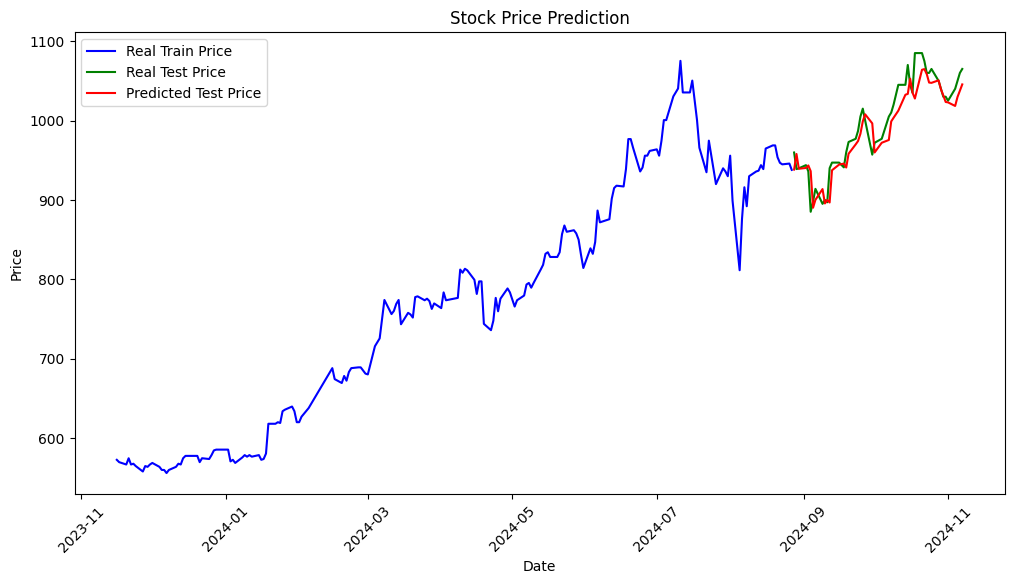

In [24]:
# 先进行模型预测（仅对测试集进行预测）
model.eval()
with torch.no_grad():
    predicted_test = model(x_test).detach().numpy()  # 模型对测试集进行预测

# 反归一化数据
predicted_test_prices = scaler.inverse_transform(predicted_test)  # 将预测的标准化值转回原始股价
real_test_prices = scaler.inverse_transform(y_test.view(-1, 1).numpy())  # 测试集真实股价
real_train_prices = scaler.inverse_transform(y_train.view(-1, 1).numpy())  # 训练集真实股价

# 绘制图表
plt.figure(figsize=(12, 6))

# 绘制训练集的真实价格 (蓝色)
plt.plot(train_dates, real_train_prices, color='blue', label='Real Train Price')

# 绘制测试集的真实价格 (绿色)
plt.plot(test_dates, real_test_prices, color='green', label='Real Test Price')

# 绘制测试集的预测价格 (红色)
plt.plot(test_dates, predicted_test_prices, color='red', label='Predicted Test Price')

# 设置标题和标签
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

# 旋转日期标签以便更好地显示
plt.xticks(rotation=45)

# 显示图例
plt.legend()
plt.show()